In [1]:
### Packages and data 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import pandas as pd
import seaborn as sns

### Load transcript-to-gene mapping
dic_transcript_gene = {}
with open("/home/mouren/Data/revisions/specificity/list_transript_gene_id_gencodeV41_all_proteincoding.tsv") as file:
    for line in file:
        tx, gene = line.strip().split()[:2]
        dic_transcript_gene[tx] = gene.split(".")[0]

### EE
ee = []
with open("/home/mouren/Data/revisions/specificity/list_ee_id") as file:
    for line in file:  
        if dic_transcript_gene[line.strip().split()[0].strip().split("_")[0]] not in ee:
            ee.append(dic_transcript_gene[line.strip().split()[0].strip().split("_")[0]])

### Neg
neg = []
with open("/home/mouren/Data/revisions/specificity/list_neg_id") as file:
    for line in file:  
        if dic_transcript_gene[line.strip().split()[0].strip().split("_")[0]] not in neg:
            neg.append(dic_transcript_gene[line.strip().split()[0].strip().split("_")[0]])

### interactions
target = []
with open("/home/mouren/Data/revisions/specificity/robust_associations_exons_genes.txt") as file:
    for line in file:  
        if line.strip().split()[1] not in target:
            target.append(line.strip().split()[1])

In [2]:
### Compute tissue specificity
df = pd.read_csv("/home/mouren/Data/gene_expr_tendency/gene_expression_tissue_specificity_score_total.csv", sep="\t", header=0)

df_res = pd.DataFrame(columns=["Dataset","Score"]) 

for gene in ee:
    filtered_row = df[df['ensgid'] == gene]
    if filtered_row.empty:
        continue
    tmp = filtered_row["tissue_specificity_score"].values[0]
    score = float(tmp.replace(",", "."))
    df_res.loc[len(df_res)] = ["cEEs\n(Host genes)",score]

for gene in target:
    filtered_row = df[df['ensgid'] == gene]
    if filtered_row.empty:
        continue
    tmp = filtered_row["tissue_specificity_score"].values[0]
    score = float(tmp.replace(",", "."))
    df_res.loc[len(df_res)] = ["cEEs\n(Target genes)",score]

for gene in neg:
    filtered_row = df[df['ensgid'] == gene]
    if filtered_row.empty:
        continue
    tmp = filtered_row["tissue_specificity_score"].values[0]
    score = float(tmp.replace(",", "."))
    df_res.loc[len(df_res)] = ["Ctrl-",score]

values = df['tissue_specificity_score'].dropna().tolist()
for i in values:
    score = float(i.replace(",", "."))
    df_res.loc[len(df_res)] = ["All",score]

In [3]:
### Plot tissue specificity 
plt.figure(figsize=(5, 5))

df_res = df_res.dropna()
df_res["Score"] = pd.to_numeric(df_res["Score"], errors="coerce")
medians = df_res.groupby("Dataset")["Score"].median()
print(medians)


Dataset
All                     0.424049
Ctrl-                   0.449511
cEEs\n(Host genes)      0.430124
cEEs\n(Target genes)    0.443857
Name: Score, dtype: float64


<Figure size 500x500 with 0 Axes>

cEEs
(Host genes) v.s. cEEs
(Target genes): t-test independent samples, P_val=9.040e-01 stat=-1.206e-01
cEEs
(Host genes) v.s. Ctrl-: t-test independent samples, P_val=1.229e-06 stat=-4.853e+00
cEEs
(Host genes) v.s. All: t-test independent samples, P_val=2.080e-01 stat=-1.259e+00


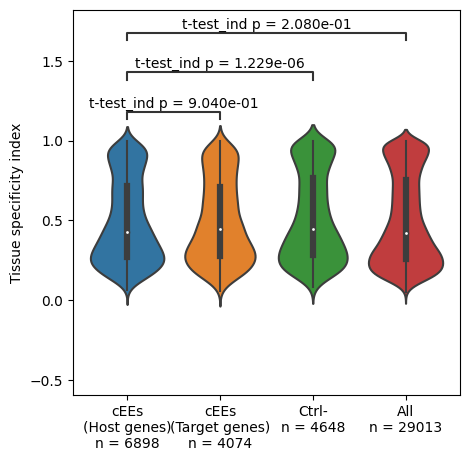

In [7]:
### Plot tissue specificity 
plt.figure(figsize=(5, 5))

df_res = df_res.dropna()
df_res["Score"] = pd.to_numeric(df_res["Score"], errors="coerce")

ax = sns.violinplot(x='Dataset', y='Score', data=df_res, order=["cEEs\n(Host genes)", "cEEs\n(Target genes)", "Ctrl-", "All"])

# >>> ADD THIS BLOCK <<<
dataset_order = ["cEEs\n(Host genes)", "cEEs\n(Target genes)", "Ctrl-", "All"]
N_per_dataset = df_res.groupby("Dataset").size().reindex(dataset_order)

new_labels = [
    f"{ds}\nn = {N_per_dataset.loc[ds]}"
    for ds in dataset_order
]

ax.set_xticks(range(len(new_labels)))
ax.set_xticklabels(new_labels)
# >>> END ADDITION <<<

ymin, ymax = ax.get_ylim()

ax.set_ylim([ymin-0.5, ymax+0.5])

# stats
from statannot import add_stat_annotation
add_stat_annotation(ax, data=df_res, x='Dataset', y='Score',
                    box_pairs=[("cEEs\n(Host genes)", "cEEs\n(Target genes)"), ("cEEs\n(Host genes)", "Ctrl-"), ("cEEs\n(Host genes)", "All")], order=["cEEs\n(Host genes)", "cEEs\n(Target genes)", "Ctrl-", "All"],
                    test='t-test_ind', text_format='full', loc='inside', verbose=1, comparisons_correction=None)

plt.ylabel('Tissue specificity index')
plt.xlabel(None)

plt.savefig("/home/mouren/Images/revisions/specificity_test/rev_1_pt4_uhlen_score.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/revisions/specificity_test/rev_1_pt4_uhlen_score.png", format="png", bbox_inches="tight", dpi=450)

plt.show()

5052
EE hg ovlp g-quadruplex (no strand): 37.47496476522513 %
3746
EE dm ovlp g-quadruplex (no strand): 27.367036820572764 %
4606
EE mm ovlp g-quadruplex (no strand): 37.61842535119242 %
875
EE tair ovlp g-quadruplex (no strand): 12.258335668254412 %
1149
neg hg ovlp g-quadruplex (no strand): 8.669735154304686 %
19
neg dm ovlp g-quadruplex (no strand): 2.104097452934662 %
1463
neg mm ovlp g-quadruplex (no strand): 7.926531939101696 %
69
neg tair ovlp g-quadruplex (no strand): 0.8776392775375222 %
115261
pos hg ovlp g-quadruplex (no strand): 28.50701786928832 %
59691
pos dm ovlp g-quadruplex (no strand): 44.79523913157678 %
59945
pos mm ovlp g-quadruplex (no strand): 40.16657620895062 %
429
pos tair ovlp g-quadruplex (no strand): 4.753462603878116 %
